<a href="https://colab.research.google.com/github/vardhan2303A52384/Exp-AI/blob/main/online_shoppers_purchasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:48:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


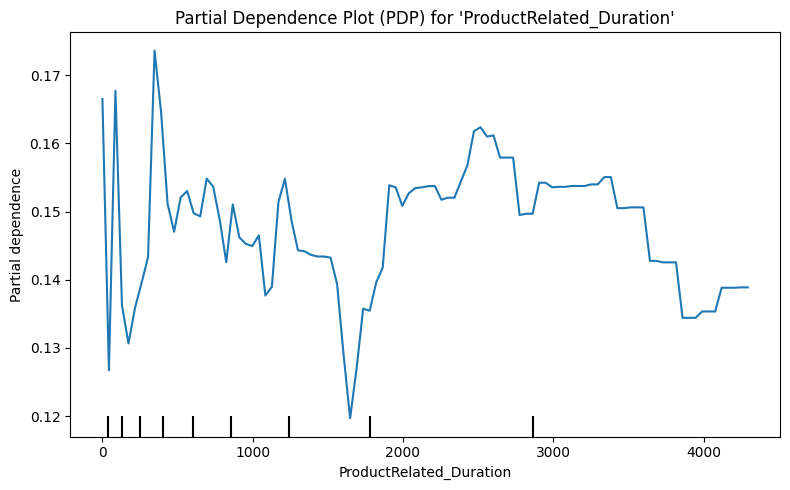

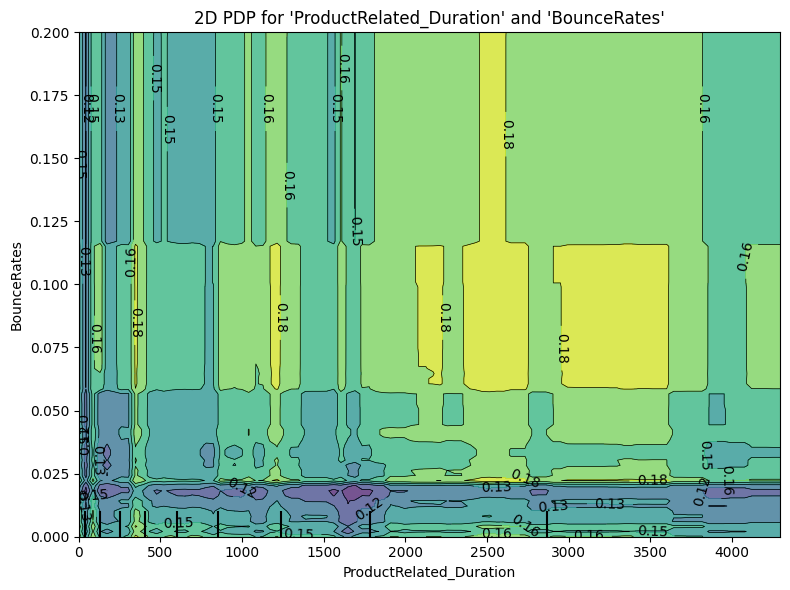

In [15]:
# 📊 Partial Dependence Plot (PDP) for XGBoost model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBClassifier

# -----------------------------
# 1️⃣ Load dataset
# -----------------------------
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop("Revenue", axis=1)
y = df_encoded["Revenue"]

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3️⃣ Train XGBoost model
# -----------------------------
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# -----------------------------
# 4️⃣ Partial Dependence Plot (PDP)
# -----------------------------
# Choose the feature(s) you want to analyze
features_to_plot = ["ProductRelated_Duration", "BounceRates"]

# Single feature PDP
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    xgb_model, X_train, [features_to_plot[0]], ax=ax, kind="average"
)
plt.title(f"Partial Dependence Plot (PDP) for '{features_to_plot[0]}'")
plt.tight_layout()
plt.show()

# -----------------------------
# 5️⃣ 2D PDP (interaction between two features)
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    xgb_model, X_train, [features_to_plot], ax=ax, kind="average"
)
plt.title(f"2D PDP for '{features_to_plot[0]}' and '{features_to_plot[1]}'")
plt.tight_layout()
plt.show()


In [5]:
# --- 0. Install LIME (Required in Colab/Jupyter) ---
!pip install lime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular

# --- 1. Load Data ---
file_name = '/content/online_shoppers_intention.csv'
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Please ensure the file is uploaded to your Colab environment.")
    exit()

# --- 2. Data Preprocessing (Must match model training) ---
# Convert boolean target and feature to integer (0 or 1)
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

# One-Hot Encode categorical features: 'Month', 'VisitorType'
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# --- 3. Model Training ---
# Split the data (optional, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a RandomForestClassifier
print("Training RandomForestClassifier...")
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=10,
    min_samples_leaf=5
)
model.fit(X_train, y_train)
print("Model training complete.")


# ----------------------------------------------------------------------
# --- 4. LIME Explanation Generation ---
# ----------------------------------------------------------------------

# 4.1. Select an instance to explain
# We choose the 5th instance (index 4) as an example.
# You can change this index to any row you want to investigate.
instance_to_explain_index = 4
instance_to_explain = X.iloc[instance_to_explain_index].values # Get feature values as a numpy array

# Predict the outcome for verification
true_class = y.iloc[instance_to_explain_index]
predicted_proba = model.predict_proba(instance_to_explain.reshape(1, -1))[0]
predicted_class = np.argmax(predicted_proba)

print(f"\n--- Explanation for Instance Index: {instance_to_explain_index} ---")
print(f"True Revenue: {true_class}")
print(f"Predicted Revenue: {predicted_class} (Probability: {predicted_proba[1]:.4f})")

# 4.2. Initialize the LIME Explainer
# The training_data must be the feature values (numpy array)
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns.tolist(),
    class_names=['No Revenue (0)', 'Revenue (1)'],
    mode='classification',
    random_state=42
)

# 4.3. Generate the explanation
# num_features: The top features to include in the explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=model.predict_proba,
    num_features=10
)

# 4.4. Plotting the LIME explanation in Colab
# LIME's show_in_notebook displays the required bar plot, text, and prediction table.
print("\n--- LIME Explanation Plot (Graph) and Values ---")
explanation.show_in_notebook(show_table=True, show_all=False)

# Optional: To save the plot as a static image file (if needed for reports)
# fig = explanation.as_pyplot_figure()
# fig.tight_layout()
# fig.savefig(f"lime_explanation_index_{instance_to_explain_index}.png")
# plt.close(fig)
# print(f"Static LIME plot saved as lime_explanation_index_{instance_to_explain_index}.png")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=231e45b443c202fd600ab80d7d807077a48c4a45e778abd81a6f9a021be279e9
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
Training RandomForestClassifier...
Model training complete.

--- Explanation for Instance Index: 4 ---
True Revenue: 0
Predicted Revenue: 0 (Probability: 0.0168)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- LIME Explanation Plot (Graph) and Values ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Dataset shape: 12330 rows, 18 columns

Columns and data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values per column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
Spec

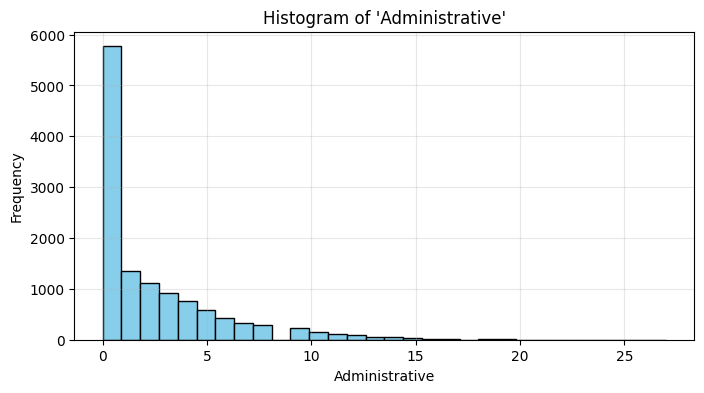

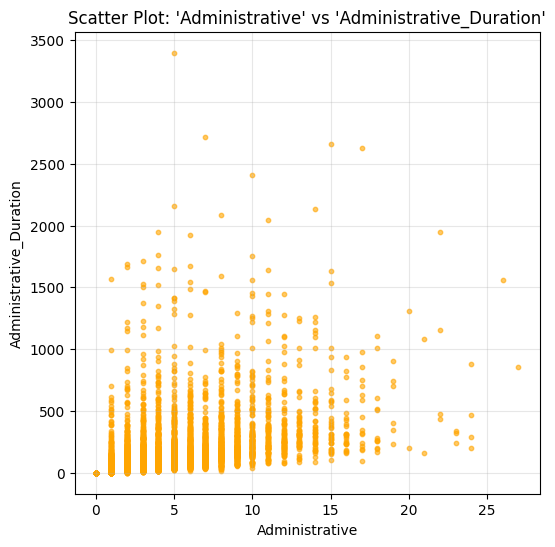

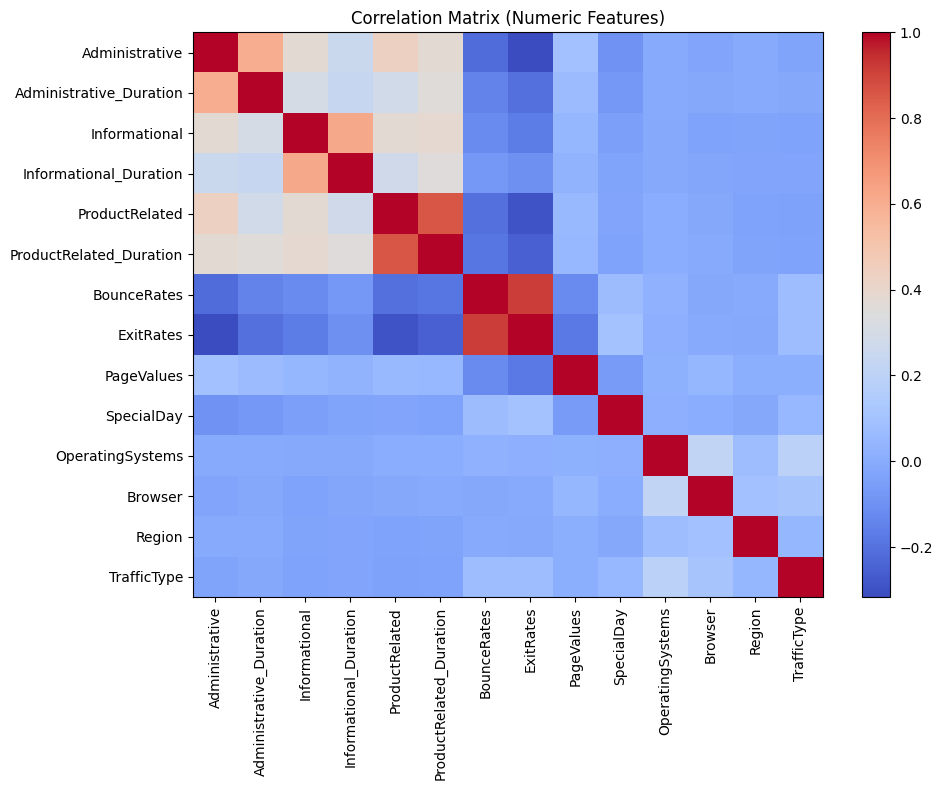

In [11]:
# 📊 Python code: Show dataset shape and generate graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

# -----------------------------
# 1️⃣ Dataset shape and info
# -----------------------------
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

print("Columns and data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# -----------------------------
# 2️⃣ Detect numeric columns
# -----------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns ({len(numeric_cols)}): {numeric_cols}")

# -----------------------------
# 3️⃣ Plot 1 — Histogram
# -----------------------------
if len(numeric_cols) >= 1:
    col1 = numeric_cols[0]
    plt.figure(figsize=(8,4))
    plt.hist(df[col1].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of '{col1}'")
    plt.xlabel(col1)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

# -----------------------------
# 4️⃣ Plot 2 — Scatter plot
# -----------------------------
if len(numeric_cols) >= 2:
    col2 = numeric_cols[1]
    plt.figure(figsize=(6,6))
    plt.scatter(df[col1], df[col2], alpha=0.6, s=10, color='orange')
    plt.title(f"Scatter Plot: '{col1}' vs '{col2}'")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(alpha=0.3)
    plt.show()

# -----------------------------
# 5️⃣ Plot 3 — Correlation Heatmap
# -----------------------------
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    im = plt.imshow(corr, cmap='coolwarm', aspect='auto')
    plt.colorbar(im)
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.title("Correlation Matrix (Numeric Features)")
    plt.tight_layout()
    plt.show()


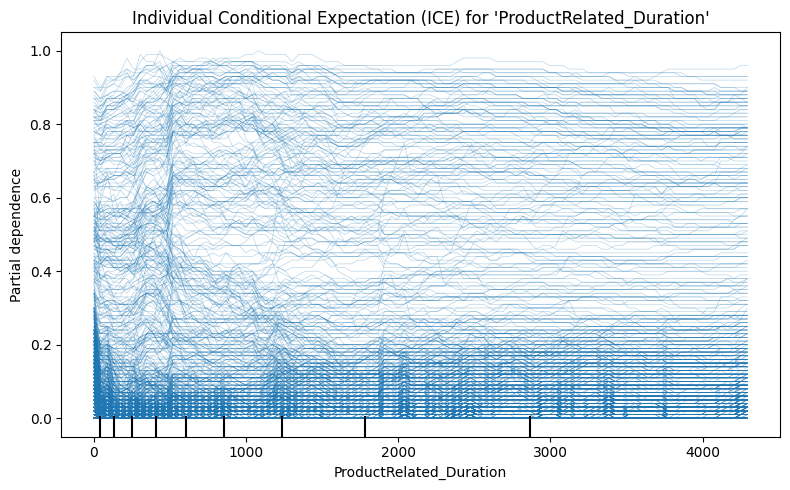

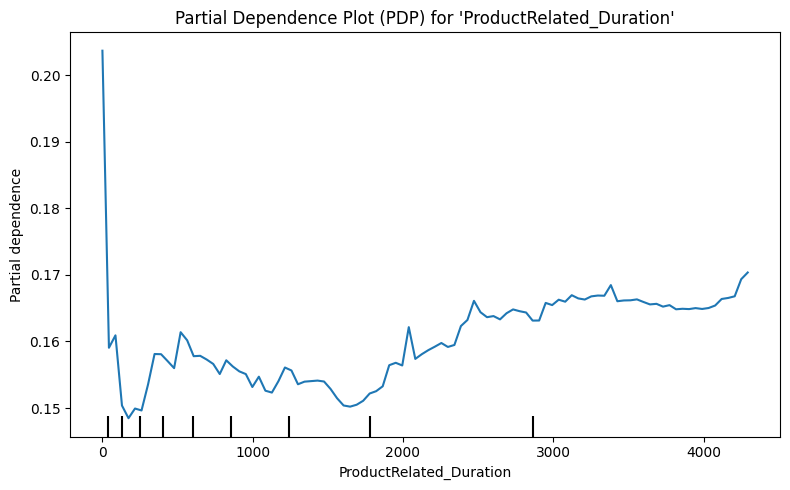

In [12]:
# 📈 Individual Conditional Expectation (ICE) Plot Example

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

# -----------------------------
# 1️⃣ Load dataset
# -----------------------------
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop("Revenue", axis=1)
y = df_encoded["Revenue"]

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3️⃣ Train model (Random Forest)
# -----------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 4️⃣ Individual Conditional Expectation (ICE) Plot
# -----------------------------
# Choose one numeric feature for ICE visualization
feature_name = "ProductRelated_Duration"  # you can change this to any feature

fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    model, X_train, [feature_name], kind="individual", ax=ax
)
plt.title(f"Individual Conditional Expectation (ICE) for '{feature_name}'")
plt.tight_layout()
plt.show()

# -----------------------------
# 5️⃣ Optional: Partial Dependence (average effect)
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    model, X_train, [feature_name], kind="average", ax=ax
)
plt.title(f"Partial Dependence Plot (PDP) for '{feature_name}'")
plt.tight_layout()
plt.show()


🔹 Logistic Regression Accuracy: 0.8730738037307381

Coefficients (feature influence):
                    Feature  Coefficient
8                PageValues     1.520555
21                Month_Nov     0.222927
5   ProductRelated_Duration     0.119897
2             Informational     0.093765
11                  Browser     0.073558
4            ProductRelated     0.056570
14                  Weekend     0.046927
13              TrafficType     0.028422
22                Month_Oct     0.022208
17                Month_Jul     0.022174

🔹 Decision Tree Accuracy: 0.8929440389294404

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.95      0.94      2055
        True       0.72      0.59      0.65       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



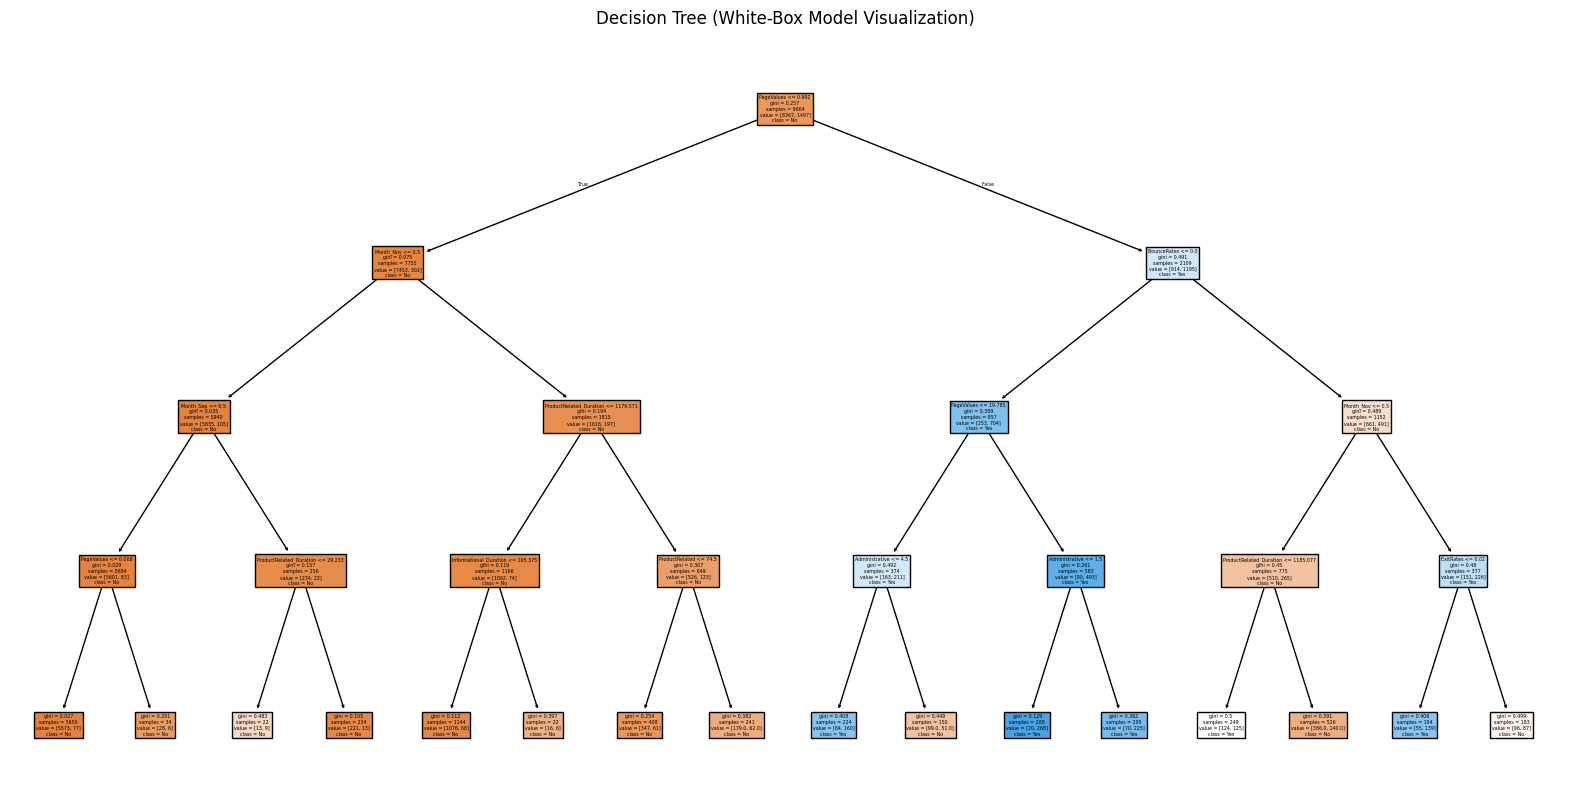

In [13]:
# 📘 White-Box Models Example (Decision Tree + Logistic Regression)
# Using: online_shoppers_intention.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1️⃣ Load dataset
# -----------------------------
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop("Revenue", axis=1)
y = df_encoded["Revenue"]

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3️⃣ Logistic Regression (white-box linear model)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nCoefficients (feature influence):")
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
print(coeff_df.head(10))

# -----------------------------
# 4️⃣ Decision Tree (white-box rule model)
# -----------------------------
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# -----------------------------
# 5️⃣ Visualize the Decision Tree
# -----------------------------
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree (White-Box Model Visualization)")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:44:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Accuracy: 0.8949716139497161
🔹 ROC-AUC: 0.9231924982684213

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.73      0.59      0.65       411

    accuracy                           0.89      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466


Confusion Matrix:
 [[1966   89]
 [ 170  241]]


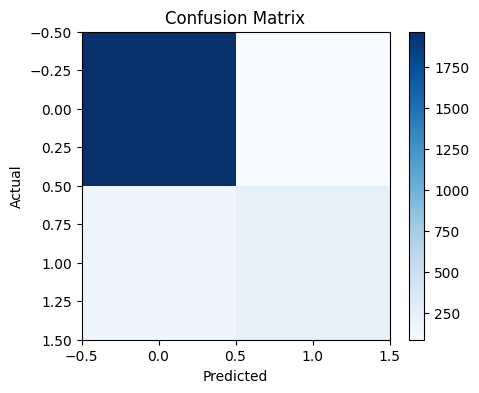

<Figure size 1000x800 with 0 Axes>

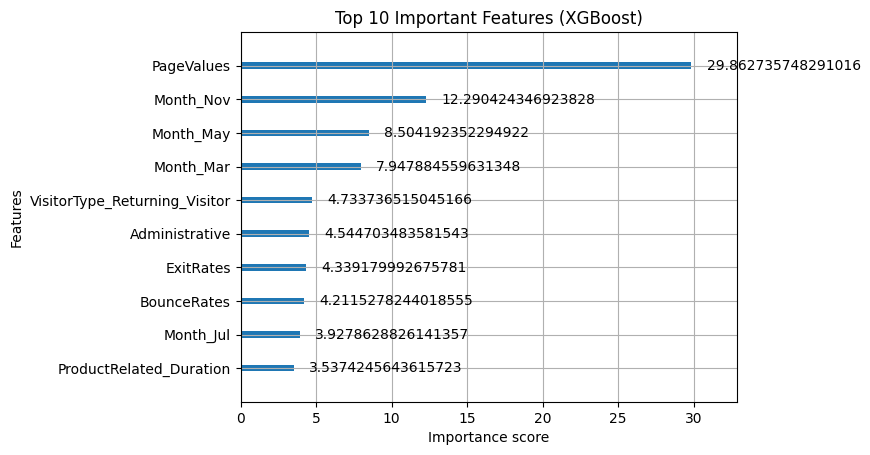

In [14]:
# 🚀 XGBoost Model for Online Shoppers Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from xgboost import XGBClassifier, plot_importance

# -----------------------------
# 1️⃣ Load dataset
# -----------------------------
df = pd.read_csv("/content/online_shoppers_intention.csv")

# Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop("Revenue", axis=1)
y = df_encoded["Revenue"]

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3️⃣ Initialize and train XGBoost model
# -----------------------------
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# -----------------------------
# 4️⃣ Make predictions
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# -----------------------------
# 5️⃣ Evaluate model
# -----------------------------
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 6️⃣ Confusion matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 7️⃣ Feature importance plot
# -----------------------------
plt.figure(figsize=(10,8))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()
